In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

In [2]:
iris = load_iris()

#convert the numpy array data to pandas dataframe
df = pd.DataFrame(data= iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#create new column for the tar
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:16

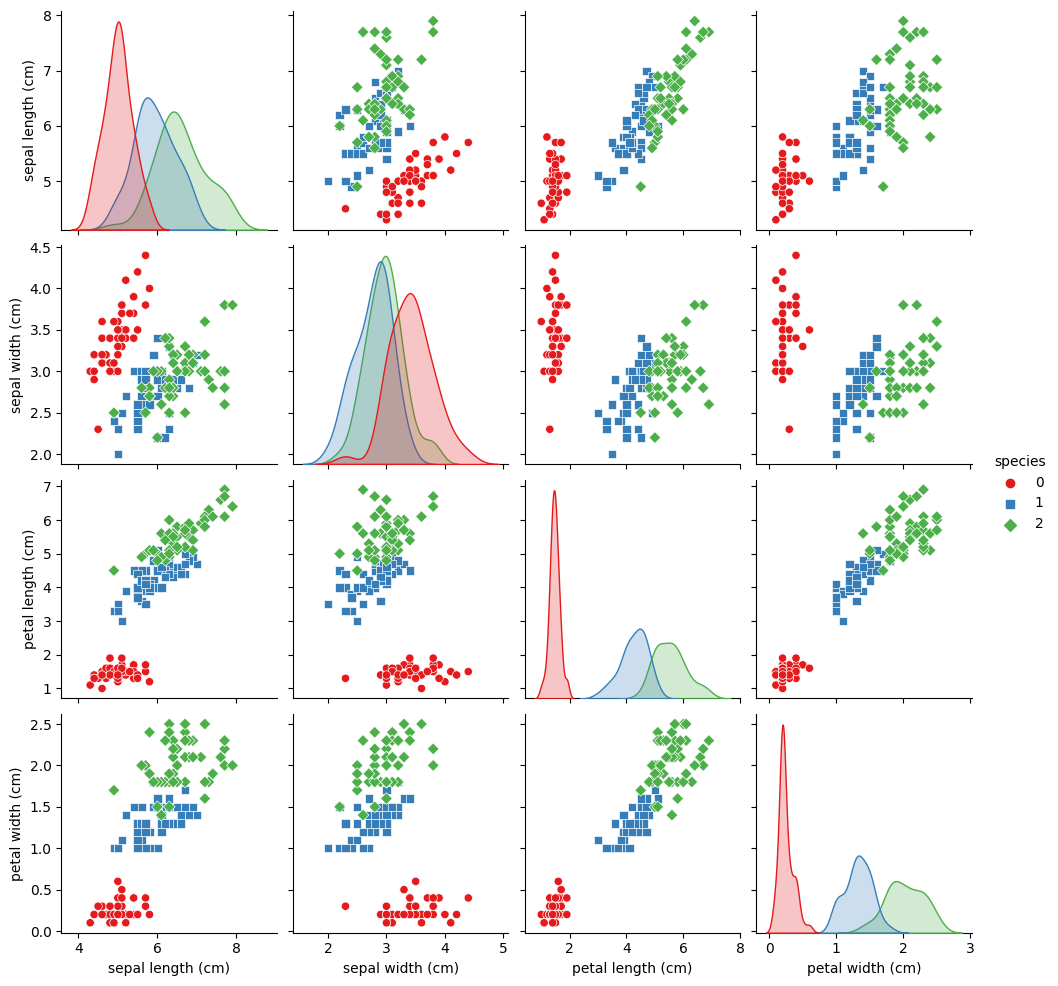

In [65]:
# Set the color palette to 'Set1' with 3 colors
custom_palette = sns.color_palette("Set1")


# Create pair plots with the custom color palette
sns.pairplot(df, hue='species',palette=custom_palette, markers=["o", "s", "D"])

# Show the plots
plt.show()


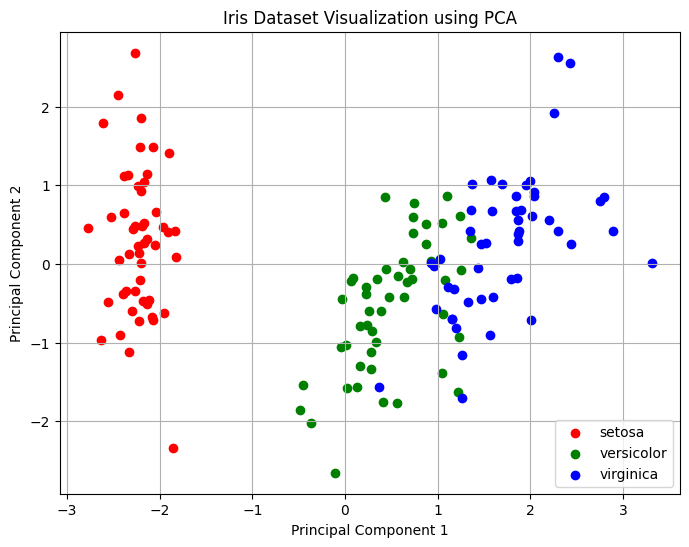

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
X, y = iris.data, iris.target

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Convert the reduced data to a DataFrame for easy plotting
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y

# Plot the reduced data using a scatter plot
plt.figure(figsize=(8, 6))
targets = np.unique(y)
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices = df_pca['Target'] == target
    plt.scatter(df_pca.loc[indices, 'Principal Component 1'],
                df_pca.loc[indices, 'Principal Component 2'],
                c=color, label=iris.target_names[target])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset Visualization using PCA')
plt.legend()
plt.grid()
plt.show()


In [36]:
X = df.drop('species', axis=1)
y = df['species']

In [34]:
from sklearn.linear_model import LogisticRegression

#call the Logistic Regression class as classifier
classifier = LogisticRegression(max_iter=1000, solver='lbfgs')

#cross validation as k-times
k=5
accuracy_score = cross_val_score(classifier, X, y,cv=k, scoring="accuracy")
precision_score = cross_val_score(classifier, X, y,cv=k, scoring="precision_macro")
recall_score = cross_val_score(classifier, X, y,cv=k, scoring="recall_macro")
f1_score = cross_val_score(classifier, X, y, scoring="f1_macro")

#get the mean of all evaluation metrics
accuracy_mean = np.mean(accuracy_score)
precision_mean = np.mean(precision_score)
recall_mean = np.mean(recall_score)
f1_mean = np.mean(f1_score)

#print all evaluation metrics
print(f"Accuracy score : {accuracy_mean:.2f}")
print(f"Precision score : {precision_mean:.2f}")
print(f"Recall score : {recall_mean:.2f}")
print(f"F1 score : {f1_mean:.2f}")

Accuracy score : 0.97
Precision score : 0.98
Recall score : 0.97
F1 score : 0.97


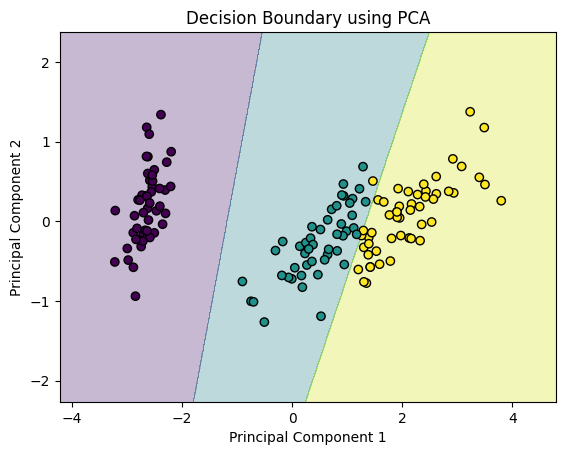

In [52]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit the classifier
classifier.fit(X_pca, y)

# Obtain cross-validated predicted labels
y_pred = cross_val_predict(classifier, X_pca, y, cv=5)

# Plot the decision boundary using PCA
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary using PCA')
plt.show()


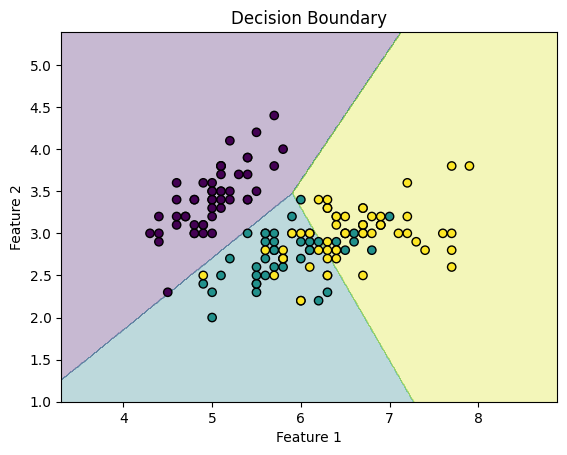

In [51]:
# Create a Logistic Regression model
classifier = LogisticRegression(max_iter=1000, solver='lbfgs')

# Cross-validation as k-times
k = 5
y_pred = cross_val_predict(classifier, X, y, cv=k)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

classifier.fit(X[:, :2], y)
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()


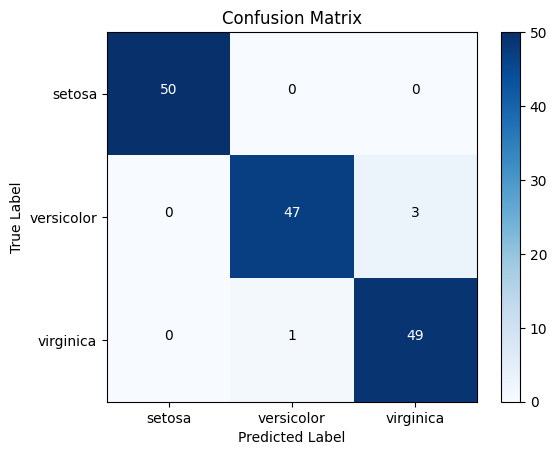

In [50]:
from sklearn.metrics import confusion_matrix

# Create a Logistic Regression model
classifier = LogisticRegression(max_iter=1000, solver='lbfgs')

# Cross-validation as k-times
k = 5
y_pred = cross_val_predict(classifier, X, y, cv=k)

# Create a confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap with annotations
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

class_names = iris.target_names
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotate the cells with their corresponding values
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center", color="white" if i == j else "black")

plt.show()


In [53]:
classifier.fit(X,y)

# Dictionary to map numerical target values to species names
target_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

sample =[[5., 2.9 , 0.9, 0.1]]

prediksi = classifier.predict(sample)
prediksi = prediksi.item()
spesies = target_mapping[prediksi]

print(f"Species prediction : {prediksi}({spesies})")

Species prediction : 0(setosa)
